# Getting the data

In [12]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets

a = datasets.load_diabetes()
pd.DataFrame(data=a.data, columns=a.feature_names) 



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


# Frame the problem

### the problem can be framed as a regression task,The objective is to develop a model that, using the Body Mass Index (BMI) feature, can forecast the risk of diabetes progression. This is accomplished by using the Scikit-Learn Diabetes dataset.The independent variable that is being employed is solely the BMI feature. The progression of diabetes is the dependent or target variable.

# EDA - Describing the data, exploring it, and providing insight on it with a statistical table and histogram

        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


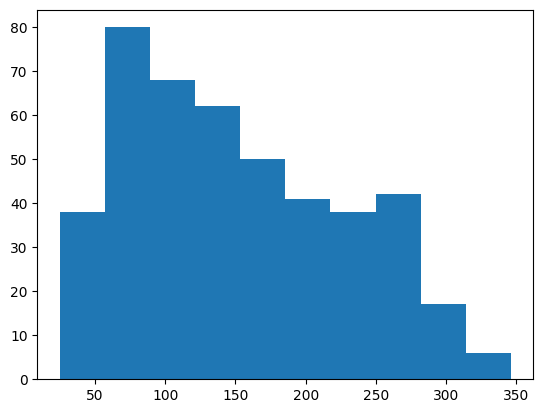

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

diabetes_data = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)
plt.hist(diabetes_data['target'])

print(df.head())



# Clean the dataset

In [15]:
from sklearn import datasets
import pandas as pd

diabetes_data = datasets.load_diabetes()
df = pd.DataFrame(data=diabetes_data.data, columns=diabetes_data.feature_names)

missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

print("Cleaned dataset:\n", df.head())

Missing values:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64
Cleaned dataset:
         age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  


# My reader after cleaning the data
### By checking for missing values, we ensure the dataset is complete and can proceed with further analysis confidently,Outliers are data points that deviate significantly from the majority of the data,Outliers can distort statistical analysis and modeling results, leading to inaccurate predictions or biased interpretations.


# Splitting the dataset to a train(70%),validation(15%) and test(15%) sets

In [18]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

diabetes_data = datasets.load_diabetes()
X = diabetes_data.data
y = diabetes_data.target

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42)

print("Train set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Train set shape: (309, 10) (309,)
Validation set shape: (66, 10) (66,)
Test set shape: (67, 10) (67,)


# A polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5 (6 models) 


In [19]:
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


diabetes_data = datasets.load_diabetes()
X = diabetes_data.data[:, np.newaxis, 2]  
y = diabetes_data.target


for degree in range(6):
    # Create polynomial features
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    
    y_pred = model.predict(X_poly)

    
    
    mse = mean_squared_error(y, y_pred)

    print(f"Degree {degree}: MSE = {mse}")

Degree 0: MSE = 5929.884896910383
Degree 1: MSE = 3890.456585461273
Degree 2: MSE = 3889.702145270231
Degree 3: MSE = 3883.3511785367314
Degree 4: MSE = 3880.5464052343646
Degree 5: MSE = 3858.093602575701


# Comparing the six models using the training and validation data,Report R-squared, MAPE and MAE. You should have 6 values per model

In [20]:
from sklearn import datasets
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np


diabetes_data = datasets.load_diabetes()
X = diabetes_data.data[:, np.newaxis, 2]  
y = diabetes_data.target


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42)


for degree in range(6):
    
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_val = polynomial_features.transform(X_val)

    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    
    y_train_pred = model.predict(X_poly_train)
    y_val_pred = model.predict(X_poly_val)

    
    r2_train = r2_score(y_train, y_train_pred)
    r2_val = r2_score(y_val, y_val_pred)

   
    mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
    mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
    
   
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val = mean_absolute_error(y_val, y_val_pred)

   
    print(f"Degree {degree}:")
    print(f"\tTraining R-squared: {r2_train:.4f}")
    print(f"\tValidation R-squared: {r2_val:.4f}")
    print(f"\tTraining MAPE: {mape_train:.2f}%")
    print(f"\tValidation MAPE: {mape_val:.2f}%")
    print(f"\tTraining MAE: {mae_train:.4f}")
    print(f"\tValidation MAE: {mae_val:.4f}")

Degree 0:
	Training R-squared: 0.0000
	Validation R-squared: -0.0071
	Training MAPE: 62.82%
	Validation MAPE: 61.23%
	Training MAE: 66.1796
	Validation MAE: 64.1742
Degree 1:
	Training R-squared: 0.3648
	Validation R-squared: 0.2048
	Training MAPE: 47.28%
	Validation MAPE: 48.52%
	Training MAE: 51.0138
	Validation MAE: 54.8704
Degree 2:
	Training R-squared: 0.3653
	Validation R-squared: 0.2019
	Training MAPE: 47.25%
	Validation MAPE: 48.50%
	Training MAE: 50.9781
	Validation MAE: 54.9050
Degree 3:
	Training R-squared: 0.3653
	Validation R-squared: 0.2055
	Training MAPE: 47.21%
	Validation MAPE: 48.40%
	Training MAE: 50.9588
	Validation MAE: 54.7257
Degree 4:
	Training R-squared: 0.3682
	Validation R-squared: 0.1647
	Training MAPE: 46.90%
	Validation MAPE: 48.04%
	Training MAE: 50.7653
	Validation MAE: 55.1346
Degree 5:
	Training R-squared: 0.3695
	Validation R-squared: 0.2004
	Training MAPE: 46.78%
	Validation MAPE: 47.63%
	Training MAE: 50.6511
	Validation MAE: 54.4506


# The best model suitable used in training and validating data in R-Squared,MSE and MAE

|   Metric    |    Value      | 
|------------ | ------------  |
|  R-Squared  |    0.2053     |            
| ----------- | ------------- |       
|   MSE       |   3535.8424   |
| ------------|-------------- |
|    MAE      |  47.9891      |
|             |               |